In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler 
from pandas.tseries.offsets import MonthEnd
import tensorflow as tf
import os
os.environ['TF_USE_LEGACY_KERAS'] = '1'
import autokeras as ak

In [2]:

df = pd.read_csv(r"D:\yPy\SY\sy_16to20_W2_obs.csv")

print(list(df.columns))
print(df.head)

df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
data=(df-df.min())/(df.max()-df.min())

#X1 = data[['AirTemp(°C)', 'CC_Pre(mm)', 'maximum instantaneous wind speed', 'maximum wind speed', 'WindSpeed(m/s)', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)', 'SC_Pre(mm)', 'IJ_Pre(mm)', 'HC_Pre(mm)']]
#X1 = data[['AirTemp(°C)', 'maximum instantaneous wind speed', 'maximum wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']]
#X1 = data[['maximum instantaneous wind speed', 'maximum wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)',  'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)']]
#X1 = data[['DewPoint(°C)', 'Vapor Pressure(hPa)',  'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)']]
#X1 = data[['AirTemp(°C)', 'DewPoint(°C)', 'Relative Humidity(%)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)']]
#X1 = data[['AirTemp(°C)', 'maximum wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)']]
X1 = data[['inflow', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)',  'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'AirTemp(°C)','CC_Pre(mm)','WindSpeed(m/s)']]
y1 = data['depth60']

X_traindepth60, X_testdepth60, y_traindepth60, y_testdepth60 =train_test_split(X1, y1, random_state=0, test_size=0.3, shuffle=False)
X_traindepth60 = X_traindepth60.values 
X_testdepth60= X_testdepth60.values 
y_traindepth60 = y_traindepth60.values 
y_testdepth60 = y_testdepth60.values 
X_traindepth60 = X_traindepth60.reshape(X_traindepth60.shape[0], X_traindepth60.shape[1], 1) 
X_testdepth60 = X_testdepth60.reshape(X_testdepth60.shape[0], X_traindepth60.shape[1], 1)

X_traindepth60 = X_traindepth60.reshape(X_traindepth60.shape[0], X_traindepth60.shape[1])
X_testdepth60 = X_testdepth60.reshape(X_testdepth60.shape[0], X_testdepth60.shape[1])


['date', 'month', 'inflow', 'AirTemp(°C)', 'CC_Pre(mm)', 'maximum instantaneous wind speed', 'maximum wind speed', 'WindSpeed(m/s)', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)', 'SC_Pre(mm)', 'IJ_Pre(mm)', 'HC_Pre(mm)', 'depth0', 'depth1', 'depth2', 'depth3', 'depth4', 'depth5', 'depth6', 'depth7', 'depth8', 'depth9', 'depth10', 'depth11', 'depth12', 'depth13', 'depth14', 'depth15', 'depth16', 'depth17', 'depth18', 'depth19', 'depth20', 'depth21', 'depth22', 'depth23', 'depth24', 'depth25', 'depth26', 'depth27', 'depth28', 'depth29', 'depth30', 'depth31', 'depth32', 'depth33', 'depth34', 'depth35', 'depth36', 'depth37', 'depth38', 'depth39', 'depth40', 'depth41', 'depth42', 'depth43', 'depth44', 'depth45', 'depth46', 'depth47', 'depth48', 'depth49', 'depth50', 'depth51', 'depth52', 'depth53', 'depth54', 'depth55', 'de

In [3]:
# Assuming X_train51_25_LSTM_O has shape (samples, sequence_length, num_features)
# Reshape the input data to (samples, sequence_length * num_features)
#X_train_reshaped = X_train51_25_LSTM_O.reshape(X_train51_25_LSTM_O.shape[0], -1)

# AutoKeras StructuredDataRegressor 인스턴스와 프로젝트 이름 지정
regressor = ak.StructuredDataRegressor(
    loss='mean_squared_error',overwrite=True, max_trials=50,
    project_name="my_structured_data_regressor_51_25")


In [4]:
# 모델 빌드 및 훈련
regressor.fit(X_traindepth60, y_traindepth60, validation_split=0.2)


Trial 50 Complete [00h 00m 44s]
val_loss: 0.00603512953966856

Best val_loss So Far: 0.004852753598242998
Total elapsed time: 00h 28m 00s
Epoch 1/312
40/40 [==============================] - 0s 800us/step - loss: 0.1712 - mean_squared_error: 0.1712
Epoch 2/312
40/40 [==============================] - 0s 751us/step - loss: 0.0645 - mean_squared_error: 0.0645
Epoch 3/312
40/40 [==============================] - 0s 783us/step - loss: 0.0532 - mean_squared_error: 0.0532
Epoch 4/312
40/40 [==============================] - 0s 782us/step - loss: 0.0461 - mean_squared_error: 0.0461
Epoch 5/312
40/40 [==============================] - 0s 778us/step - loss: 0.0413 - mean_squared_error: 0.0413
Epoch 6/312
40/40 [==============================] - 0s 789us/step - loss: 0.0380 - mean_squared_error: 0.0380
Epoch 7/312
40/40 [==============================] - 0s 739us/step - loss: 0.0354 - mean_squared_error: 0.0354
Epoch 8/312
40/40 [==============================] - 0s 757us/step - loss: 0.0333 - m

INFO:tensorflow:Assets written to: .\my_structured_data_regressor_51_25\best_model\assets


In [5]:
# SavedModel 형식을 사용하여 최적의 모델 저장
model_save_path = "./best_model_structured_data_regressor_51_25"
regressor.export_model().save(model_save_path)

# 모델 로드
loaded_model = tf.keras.models.load_model(model_save_path)

# 로드된 모델의 요약 표시
loaded_model.summary()

INFO:tensorflow:Assets written to: ./best_model_structured_data_regressor_51_25\assets


INFO:tensorflow:Assets written to: ./best_model_structured_data_regressor_51_25\assets


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 9)]               0         
                                                                 
 multi_category_encoding (M  (None, 9)                 0         
 ultiCategoryEncoding)                                           
                                                                 
 dense (Dense)               (None, 32)                320       
                                                                 
 re_lu (ReLU)                (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 re_lu_1 (ReLU)              (None, 32)                0         
                                                             

In [6]:
# 테스트 데이터에서 예측
y_preddepth60 = regressor.predict(X_testdepth60)

18/18 [==============================] - 0s 650us/step


In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error




# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_testdepth60, y_preddepth60))

# 회귀 지표 계산
mse = mean_squared_error(y_testdepth60, y_preddepth60)
mae = mean_absolute_error(y_testdepth60, y_preddepth60)
# RMSE 출력
print(f'Root Mean Squared Error (RMSE): {rmse}')

print("평균 제곱 오차 (MSE):", mse)
print("평균 절대 오차 (MAE):", mae)

from sklearn.metrics import r2_score

# 예측 값과 실제 값 간의 R² 계산
r2 = r2_score(y_testdepth60, y_preddepth60)

# R² 출력
print(f'R-squared (R²): {r2}')

Root Mean Squared Error (RMSE): 0.22676652092928695
평균 제곱 오차 (MSE): 0.051423055014372734
평균 절대 오차 (MAE): 0.17142815025498212
R-squared (R²): 0.11891638809531646


17/17 [==============================] - 0s 768us/step


Text(0.5, 1.0, 'Prices vs Predicted price Index: $Y_i$ vs $\\hat{Y}_i$')

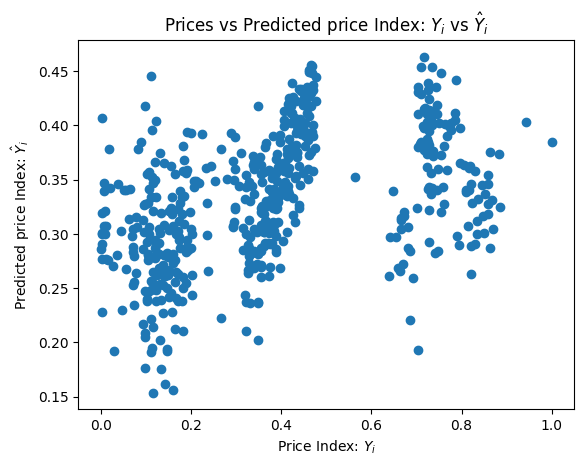

In [8]:
%matplotlib inline 
import matplotlib.pyplot as plt   
y_preddepth60 = regressor.predict(X_testdepth60, batch_size=34) 
plt.scatter(y_testdepth60, y_preddepth60) 
plt.xlabel("Price Index: $Y_i$") 
plt.ylabel("Predicted price Index: $\hat{Y}_i$") 
plt.title("Prices vs Predicted price Index: $Y_i$ vs $\hat{Y}_i$")

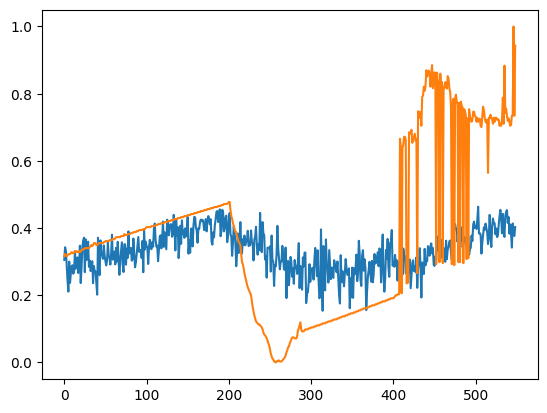

In [9]:
plt.plot(y_preddepth60)
plt.plot(y_testdepth60)

In [10]:

gb=pd.DataFrame(y_preddepth60)
gb.to_csv(r'D:\yPy\SY\SY_NAS_pred_depth60_v4.csv', index=False, mode='w', encoding='utf-8-sig')